In [5]:
from operator import itemgetter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

In [6]:
!curl -o "results.html" "https://www.strawpoll.me/20698970/r"

!echo "score, count" > results_table.txt
!sed -n -E 's|<p class="option-text"><span>([0-9]*)[^<]*</span> <span class="option-count" data-count="([0-9]*)">[^<]*</span></p>|\1, \2|gp' 'results.html' >> results_table.txt

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: POLL_URL
sed: can't read results.html: No such file or directory


# Python

In [8]:
# requests and bs4
url = "https://www.strawpoll.me/20698970/r"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")

In [10]:
# processing html into python object
results = []

rlist = soup.find("div", attrs={"class": "results"})
data_items = rlist.find_all("p", attrs={"class": "option-text"})
for item in data_items:
    score = item.span.next
    # print("regex: ", re.search('\d*', score.string).group(0))
    score_trunc = re.search('\d*', score.string).group(0)
    tally = item.find("span", attrs={"class": "option-count"}).get("data-count")
    # print("{}, {}".format(score_trunc, tally))
    results.append((int(score_trunc), int(tally)))

results.sort(key=itemgetter(0))

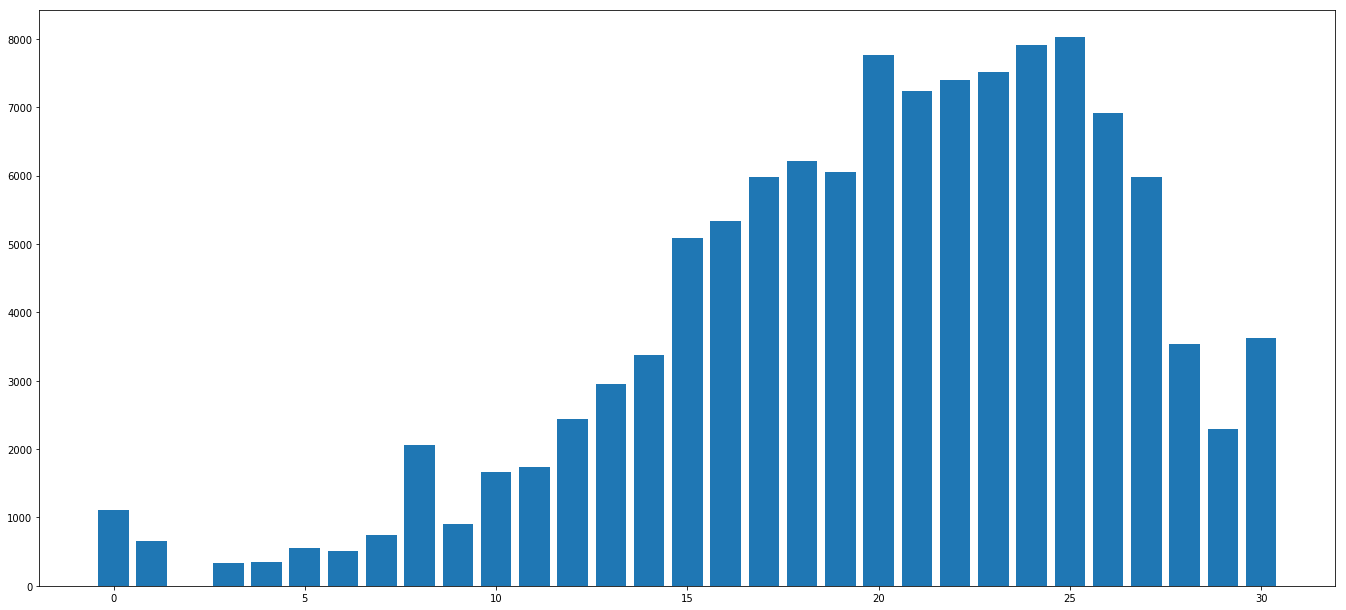

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
x_coords, y_coords = zip(*results)

ax.bar(x_coords, y_coords)
plt.show()